In [1]:
# gets all of numpy but you will still need to refer to e.g. numpy.random.randn() as random.randn()
from numpy import *               # all of the array capable elements for numerical data          
from scipy.stats import norm      # comprehensive functions for Gaussian normal distributions
import csv                        # library for reading and writing comma separated value files
from matplotlib.pyplot import *   # all of pyplot to graph the results of our calculations

# put figures inline in the notebook, so you don't have to call show()
%matplotlib inline

# This lets you make the default figure size larger (or smaller)
from IPython.core.pylabtools import figsize
figsize(14, 7)

## ThingSpeak Library

ThingSpeak (https://thingspeak.com) is a service from MathWorks for recording data in the cloud. If your microcontroller has WiFi you can record data directly from your project to the cloud without a computer as an intermediate, then examine and analyze that data later. To use the library to download some data, you probably need to type

`pip install thingspeak`

at a terminal prompt and pip will install version 0.4.1 of thingspeak, which is abysmally documented at https://media.readthedocs.org/pdf/thingspeak/latest/thingspeak.pdf I mostly faked my way through with a little help by copying almost directly from https://github.com/whatnick/TS_EnergyMonitor/blob/master/LSTM%2BEnergy%2BSeries.ipynb It all seems to work well enough. There are probably lots more options I don't know about.

ThingSpeak channel 208679 has greenhouse temperature data that is publicly readable.

### First extract a single field as a time series and plot the data:

In [2]:
import thingspeak
import json
import datetime

channel_id = 208679
read_key    = "CJZFLMXF3T22C3DH"

channel = thingspeak.Channel(id=channel_id,api_key=read_key)

series_json = None
num_results = 8000

try:
    series_json = channel.get_field(field='field3', options = {'results': num_results})
except:
    raise
    print("connection failed")

data = json.loads(series_json)

In [3]:
x = list()
y = list()
for entry in data['feeds']:
    if(entry[u'field3'] != None):
        y.append(float(entry[u'field3']))
        x.append(datetime.datetime.strptime(entry[u'created_at'],'%Y-%m-%dT%H:%M:%SZ'))

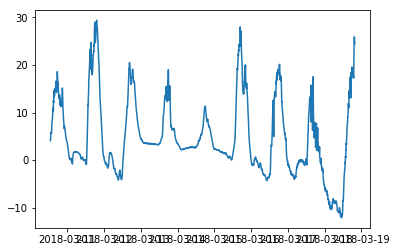

In [4]:
times = array(x)
gh3 = array(y)
plot(times,gh3)

### Now try for multiple fields from the same get() and break into time series:

In [37]:
series_json = None
num_results = 15000

try:
    # Get the last num_results readings
    series_json = channel.get(options = {'results': num_results})
except:
    raise
    print("connection failed")
data = json.loads(series_json)
#data

In [38]:
t1 = list()
GH1 = list()
t2 = list()
GH2 = list()
t3 = list()
GH3 = list()
t4 = list()
GH4 = list()
for entry in data['feeds']:
    if(entry[u'field1'] != None):
        GH1.append(float(entry[u'field1']))
        t1.append(datetime.datetime.strptime(entry[u'created_at'],'%Y-%m-%dT%H:%M:%SZ'))
    if(entry[u'field2'] != None):
        GH2.append(float(entry[u'field2']))
        t2.append(datetime.datetime.strptime(entry[u'created_at'],'%Y-%m-%dT%H:%M:%SZ'))
    if(entry[u'field3'] != None):
        GH3.append(float(entry[u'field3']))
        t3.append(datetime.datetime.strptime(entry[u'created_at'],'%Y-%m-%dT%H:%M:%SZ'))
    if(entry[u'field4'] != None):
        GH4.append(float(entry[u'field4']))
        t4.append(datetime.datetime.strptime(entry[u'created_at'],'%Y-%m-%dT%H:%M:%SZ'))

In [39]:
t1 = array(t1)
t2 = array(t2)
t3 = array(t3)
t4 = array(t4)
GH1 = array(GH1)
GH2 = array(GH2)
GH3 = array(GH3)
GH4 = array(GH4)


Text(0,0.5,'Temperature [C]')

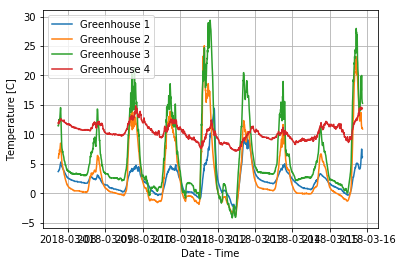

In [40]:
plot(t1,GH1,label='Greenhouse 1')
plot(t2,GH2,label='Greenhouse 2')
plot(t3,GH3,label='Greenhouse 3')
plot(t4,GH4,label='Greenhouse 4')
grid()
legend()
xlabel('Date - Time')
ylabel('Temperature [C]')